In [1]:
from collections import OrderedDict

import torch
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

from learning_ai import models
from learning_ai import helpers

In [2]:
# Use standard FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)
test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



In [58]:
# put all hyper params into a OrderedDict, easily expandable
params = OrderedDict(
    lr = [.001],
    batch_size = [1000],
    shuffle = [True]
)
epochs = 15

In [59]:
m = helpers.RunManager()

# get all runs from params using RunBuilder class
for run in helpers.RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    network = models.Network()
    loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = torch.optim.Adam(network.parameters(), lr=run.lr)

    m.begin_run(run, network, loader)
    for epoch in range(epochs):
      
      m.begin_epoch()
      for batch in loader:
        
        images = batch[0]
        labels = batch[1]
        preds, embedding = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        m.track_loss(loss)
        m.track_num_correct(preds, labels)

      m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

tensor(10.2902, grad_fn=<MaxBackward1>)
Ankle boot
Ankle boot


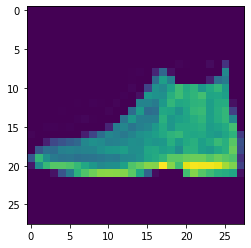

tensor(14.5103, grad_fn=<MaxBackward1>)
Pullover
Pullover


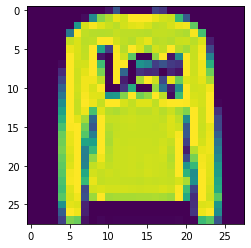

tensor(15.5792, grad_fn=<MaxBackward1>)
Trouser
Trouser


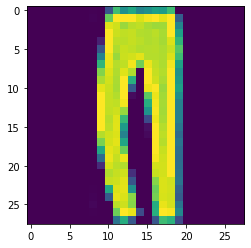

tensor(15.5128, grad_fn=<MaxBackward1>)
Trouser
Trouser


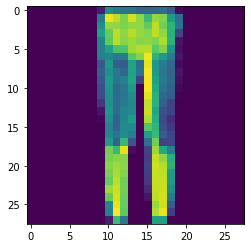

tensor(6.4049, grad_fn=<MaxBackward1>)
Shirt
Shirt


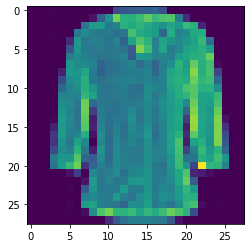

tensor(11.9040, grad_fn=<MaxBackward1>)
Trouser
Trouser


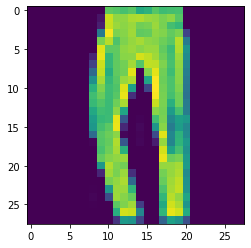

tensor(6.7435, grad_fn=<MaxBackward1>)
Coat
Coat


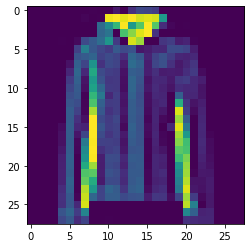

tensor(6.3756, grad_fn=<MaxBackward1>)
Shirt
Shirt


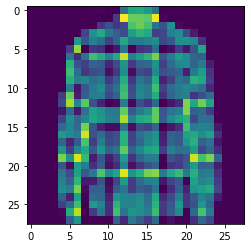

tensor(4.6602, grad_fn=<MaxBackward1>)
Sandal
Sandal


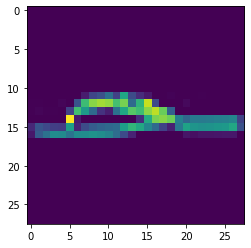

tensor(9.7587, grad_fn=<MaxBackward1>)
Sneaker
Sneaker


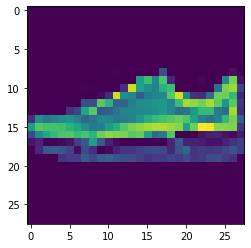

tensor(8.9717, grad_fn=<MaxBackward1>)
Coat
Coat


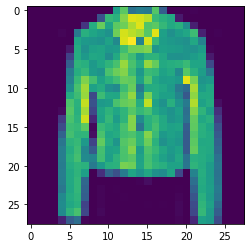

In [60]:
import matplotlib.pyplot as plt

network.eval()
count = 0
for images, labels in test_set:
    output, embedding = network(images[None, ...])
    print(torch.max(output))
    print(test_set.classes[torch.argmax(output)])
    print(test_set.classes[labels])

    plt.figure()
    plt.imshow(images[0])
    plt.show()
    # Just for demonstration
    if count == 10:
        break
    else:
        count+=1
    

In [61]:
import matplotlib.pyplot as plt
embeddings = []
labels = []
network.eval()
count = 0
for image, label in test_set:
    output, embedding = network(image[None, ...])
    embeddings.append(embedding.detach().numpy()[0])
    labels.append(test_set.classes[label])

In [62]:
from sklearn.manifold import TSNE

In [63]:
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embeddings)

In [64]:
import seaborn as sns
import pandas

In [65]:
reduced_embeddings_df = pandas.DataFrame(reduced_embeddings, columns=['x','y'])
reduced_embeddings_df['labels'] = labels

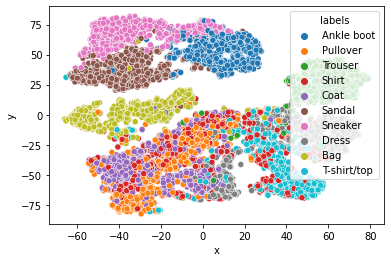

In [66]:
sns.scatterplot(data=reduced_embeddings_df, x='x', y='y', hue='labels');